# Infere Cloud based on competency names Async

This notebook contains an example on how to infere the cloud name based on competency name.

In [1]:
import os
import pandas as pd


## Load Competencies from file

In [2]:
# Load the Excel file
competencies_df = pd.read_excel('./input_data/competencies_sampled.xlsx')

# Display the first few rows of the dataframe
competencies_df.head(30)

,competency_id,competency_name,area_name,major_type_name
0,764,Azure Core Services,Azure,Cloud
1,974,Grendel-Scan,Vulnerability Scanning (Penetration Testing),Cybersecurity
2,1517,Adobe Commerce - Sales module configurations,Ecommerce,Backend
3,1353,MicroStrategy - Admin,Reporting Tools,Data Analytics
4,1288,Eggplant Performance,Load & Performance Testing Tools,Quality
5,1232,BentoML (Model Deployment),MLOps,Machine Learning & Artificial Intelligence
6,304,Google Cloud Bigtable,NoSQL,Databases
7,562,SAP SSFF Recruiting and Recruiting Marketing,SAP,Enterprise Platforms
8,1278,Microsoft Playwright,Automated Testing Frameworks & Tools,Quality
9,1150,Push notifications,Android,Mobile


## Use OpenAI to infer cloud

In [3]:
import asyncio
import nest_asyncio
from openai import AsyncAzureOpenAI

client = AsyncAzureOpenAI(
    # This is the default and can be omitted
    api_key=os.getenv('AZURE_AI_GPT_4O_MINI_API_KEY'),
    api_version='2024-02-15-preview',
    azure_endpoint='https://aiservice-guild-demos-dev-eastus2-01.openai.azure.com/'
)


In [4]:

prompt = "You are an expert in the tehcnology providers. For the given text, determine if the service belongs to Azure, GCP, AWS, SAP, Salesforce or Oracle. If not sure, return NA. Give the result in plain text, just with the name of the cloud or NA. Do not add markdown formatting."

In [5]:
nest_asyncio.apply()

limit = asyncio.Semaphore(15)

async def get_cloud_inferance(text):
  async with limit:
        chat_completion = await client.chat.completions.create(
            messages=[
              {
                "role": "system",
                "content": prompt
              },
              {
                "role": "user",
                "content": text
              }
            ],
            model= "gpt-4o-mini",
            temperature= 0,
          )
        
        # When workers hit the limit, they'll wait for a second
        # before making more requests.
        if limit.locked():
            print("Concurrency limit reached, waiting ...")
            await asyncio.sleep(1)
    
        return chat_completion.choices[0].message.content

def apply_async_get_cloud_inferance(dfi):
    loop = asyncio.get_event_loop()
    tasks = [loop.create_task(get_cloud_inferance(row['competency_name'])) for _, row in dfi.iterrows()]
    return loop.run_until_complete(asyncio.gather(*tasks))

## Test with first 50

In [8]:
competencies_df_top_50 = competencies_df.head(50)

In [9]:
competencies_df_top_50['cloud_inference'] = apply_async_get_cloud_inferance(competencies_df_top_50)

Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached

/var/folders/nm/qk4d8j1s0sbdz2bkqy39qkzh0000gn/T/ipykernel_70507/2111087769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  competencies_df_top_50['cloud_inference'] = apply_async_get_cloud_inferance(competencies_df_top_50)


In [10]:
competencies_df_top_50.head(100)

,competency_id,competency_name,area_name,major_type_name,cloud_inference
0,764,Azure Core Services,Azure,Cloud,Azure
1,974,Grendel-Scan,Vulnerability Scanning (Penetration Testing),Cybersecurity,NA
2,1517,Adobe Commerce - Sales module configurations,Ecommerce,Backend,NA
3,1353,MicroStrategy - Admin,Reporting Tools,Data Analytics,NA
4,1288,Eggplant Performance,Load & Performance Testing Tools,Quality,NA
5,1232,BentoML (Model Deployment),MLOps,Machine Learning & Artificial Intelligence,NA
6,304,Google Cloud Bigtable,NoSQL,Databases,GCP
7,562,SAP SSFF Recruiting and Recruiting Marketing,SAP,Enterprise Platforms,SAP
8,1278,Microsoft Playwright,Automated Testing Frameworks & Tools,Quality,NA
9,1150,Push notifications,Android,Mobile,NA


## Test with full dataframe

In [12]:
competencies_df['cloud_inference'] = apply_async_get_cloud_inferance(competencies_df)

Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached, waiting ...
Concurrency limit reached

In [ ]:
competencies_df.head(100)

,competency_id,competency_name,area_name,major_type_name,cloud_inference
0,764,Azure Core Services,Azure,Cloud,Azure
1,974,Grendel-Scan,Vulnerability Scanning (Penetration Testing),Cybersecurity,NA
2,1517,Adobe Commerce - Sales module configurations,Ecommerce,Backend,NA
3,1353,MicroStrategy - Admin,Reporting Tools,Data Analytics,NA
4,1288,Eggplant Performance,Load & Performance Testing Tools,Quality,NA
...,...,...,...,...,...
95,641,Style Guide Creation,Skills,Design,NA
96,394,Benchmarking,Skills,Design,NA
97,141,React Native,Cross-Platform,Mobile,NA
98,1309,Spring Cloud Data Flow,Frameworks,Backend,NA


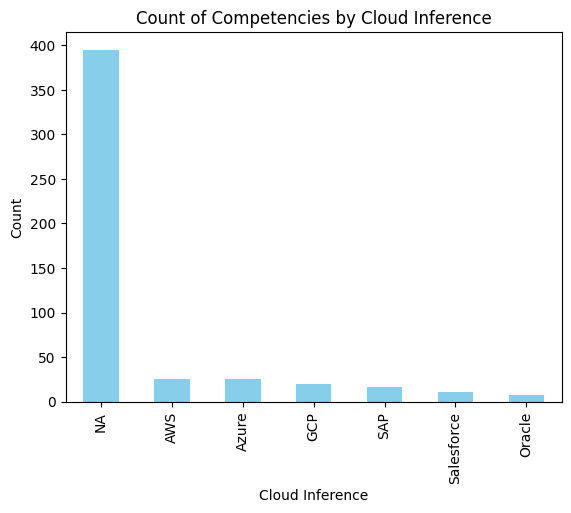

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each cloud inference
cloud_counts = competencies_df['cloud_inference'].value_counts()

# Plot the counts as a bar chart
cloud_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cloud Inference')
plt.ylabel('Count')
plt.title('Count of Competencies by Cloud Inference')
plt.show()